In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_excel('Data/liste_incendies_ de_1981_au_20_09_2022.xlsx', sheet_name='Brute')

In [4]:
df.columns

Index(['Année', 'Numéro', 'Type de feu', 'Département', 'Code INSEE',
       'Commune', 'Lieu-dit', 'Code du carreau DFCI', 'DFCI_2', 'Alerte',
       'mois', 'heure', 'Origine de l'alerte', 'Surface parcourue (m2)',
       'surf_ha'],
      dtype='object')

In [5]:
dfci = df.pivot_table(index='DFCI_2', values='Surface parcourue (m2)', aggfunc=['count', 'sum']).reset_index()
dfci.columns = ["_".join(a) for a in dfci.columns.to_flat_index()]

In [6]:
dfci.head()

,DFCI_2_,count_Surface parcourue (m2),sum_Surface parcourue (m2)
0,FC04K0,1,40000
1,FC06L7,1,600
2,FC20L9,1,10000
3,FC26B5,1,15000
4,FC26C2,1,25


In [7]:
insee = df.pivot_table(index='Code INSEE', values='Surface parcourue (m2)', aggfunc=['count', 'sum']).reset_index()
insee.columns = ["_".join(a) for a in insee.columns.to_flat_index()]

In [8]:
insee.head()

,Code INSEE_,count_Surface parcourue (m2),sum_Surface parcourue (m2)
0,04001,10,34105
1,04004,13,754412
2,04005,8,66970
3,04006,2,41200
4,04007,2,500


In [9]:
df1 = df[df['Département']=='06']
df1.head()

,Année,Numéro,Type de feu,Département,Code INSEE,Commune,Lieu-dit,Code du carreau DFCI,DFCI_2,Alerte,mois,heure,Origine de l'alerte,Surface parcourue (m2),surf_ha
1,1981,62,0,06,06140,Tignet (Le),TIGNET LE,LD86H8,LD86H8,1981-01-01 05:19:00,1,5,NaN,20000,2.0
16,1981,77,0,06,06023,Breil-sur-Roya,BREIL SUR ROYA,MD08F6,MD08F6,1981-01-01 16:30:00,1,16,NaN,2000000,200.0
22,1981,83,0,06,06021,Bonson,BONSON,LD88F2,LD88F2,1981-01-01 23:50:00,1,23,6.0,20000,2.0
31,1981,92,0,06,06102,Rimplas,RIMPLAS,LE80B3,LE80B3,1981-01-03 12:00:00,1,12,3.0,610000,61.0
48,1981,57,0,06,06053,Daluis,DALUIS,LE40H1,LE40H1,1981-01-04 10:30:00,1,10,NaN,20000,2.0


In [10]:
df2 = pd.pivot_table(df1, index='Année', values='Surface parcourue (m2)', aggfunc=['count','sum']).reset_index()
df2.columns = ["_".join(a) for a in df2.columns.to_flat_index()]

In [11]:
df2.columns

Index(['Année_', 'count_Surface parcourue (m2)', 'sum_Surface parcourue (m2)'], dtype='object')

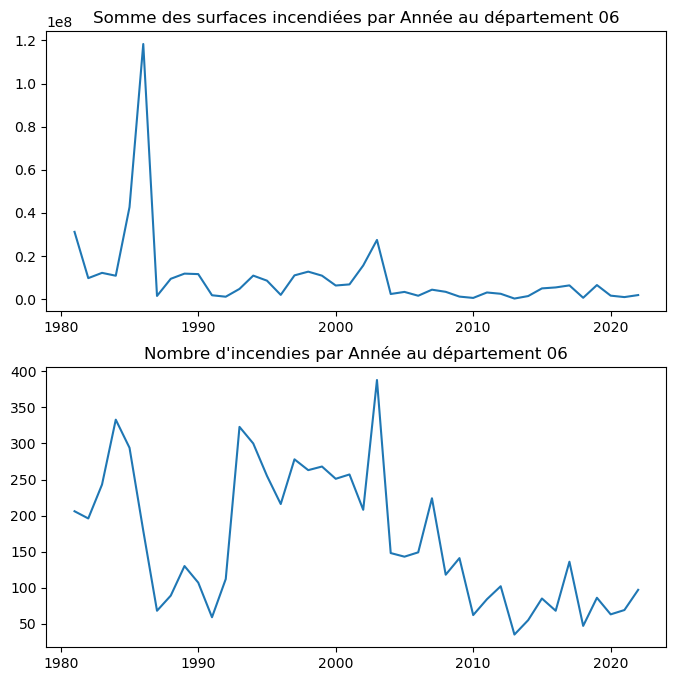

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(8,8))
ax[0].plot(df2['Année_'], df2['sum_Surface parcourue (m2)'])
ax[0].set_title('Somme des surfaces incendiées par Année au département 06')
ax[1].plot(df2['Année_'], df2['count_Surface parcourue (m2)'])
ax[1].set_title("Nombre d'incendies par Année au département 06")
plt.show()

In [13]:
df3 = df[['Département', 'surf_ha']].groupby('Département').sum().reset_index().sort_values('surf_ha', ascending=False)
df3.head(10)

,Département,surf_ha
8,2B,177452.1777
13,83,120894.1082
7,2A,93802.4820
5,13,74537.9690
2,06,43278.1021
4,11,32727.4647
12,66,32696.3302
9,30,30198.7309
10,34,29708.8620
3,07,29213.0988


In [29]:
fig = px.pie(df3, values='surf_ha', names='Département', title="Nombre d'incendie par département", hover_data= ['Département'])
fig.show()

In [30]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

# Assuming df_grouped and years are defined as in your snippet
fig = go.Figure()

df_grouped = df.groupby(['Année', 'Département'])['surf_ha'].sum().reset_index()
years = df['Année'].unique()

# Add traces for each year
for i, year in enumerate(years):
    df_year = df_grouped[df_grouped['Année'] == year]
    pie = px.pie(df_year, values='surf_ha', names='Département', title=f"Surface brûlée par département en {year}")
    for trace in pie.data:
        fig.add_trace(trace)
    # Set visibility: only show the first year's data initially
    fig.data[i].visible = i == 0

# Create slider steps
steps = []
for i, year in enumerate(years):
    step = dict(
        method="update",
        args=[{"visible": [j == i for j in range(len(years))]},  # Only one trace is visible at a time
              {"title": f"Surface brûlée par département en {year}"}],
        label=str(year)
    )
    steps.append(step)

# Create sliders
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Année: "},
    pad={"t": 50},
    steps=steps
)]

# Update layout with sliders
fig.update_layout(
    sliders=sliders,
    margin=dict(l=20, r=20, t=40, b=20),
    width=800,
    height=600
)

# Display the figure inline in Colab
pio.renderers.default = "vscode"  # Ensure the renderer is set to Colab
fig.show()